In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from data_utils import FaceData
from data_utils_background import FaceDataCropped
import time
import os

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

plt.ion()   # interactive mode

In [2]:
train_data = FaceDataCropped(image_paths_file='LAG_background/train/train.txt')
val_data = FaceData(image_paths_file='LAG/val/val.txt')
test_data = FaceData(image_paths_file='LAG/train/train.txt')

/home/carlodedonno/anaconda3/lib/python3.6/site-packages/torch/serialization.py:316: SourceChangeWarning: source code of class 'classifiers.convage_nn_3.ConvAgeNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


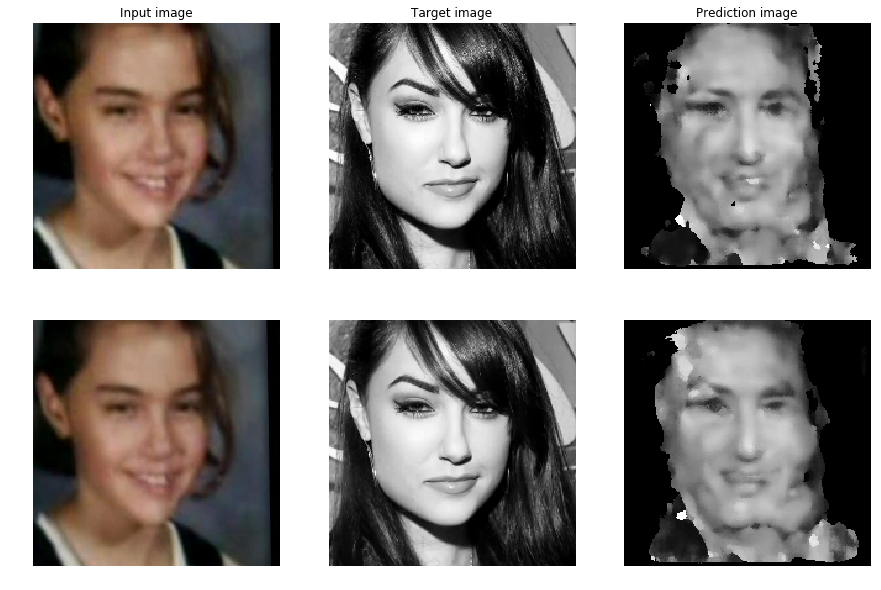

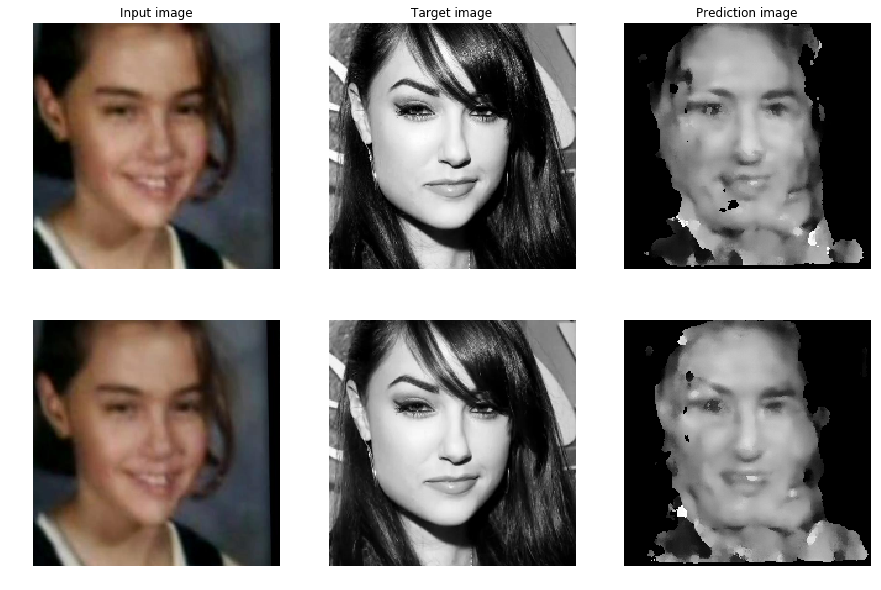

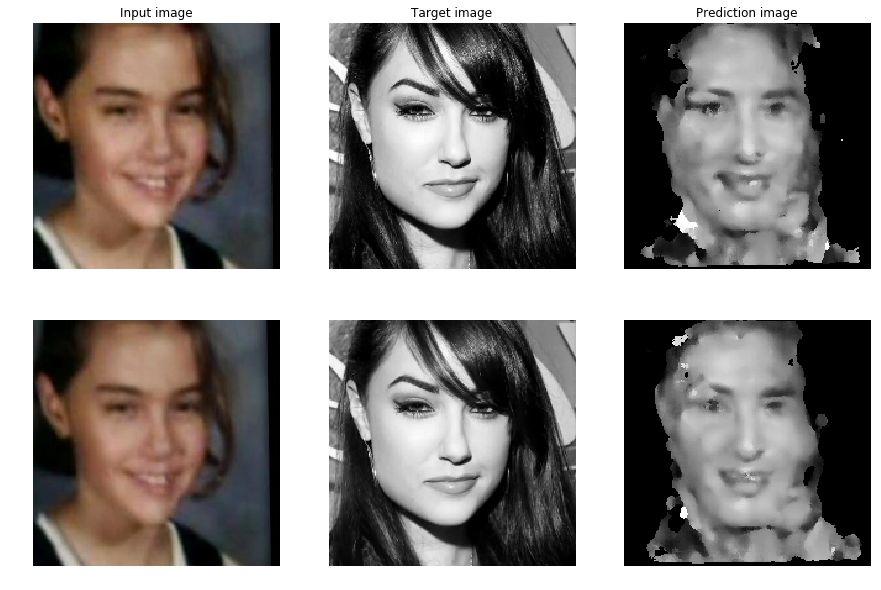

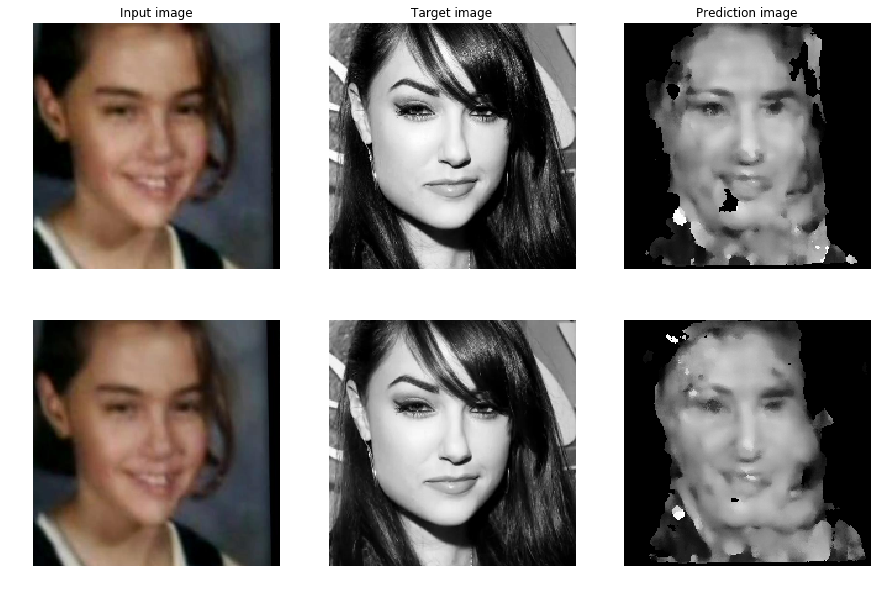

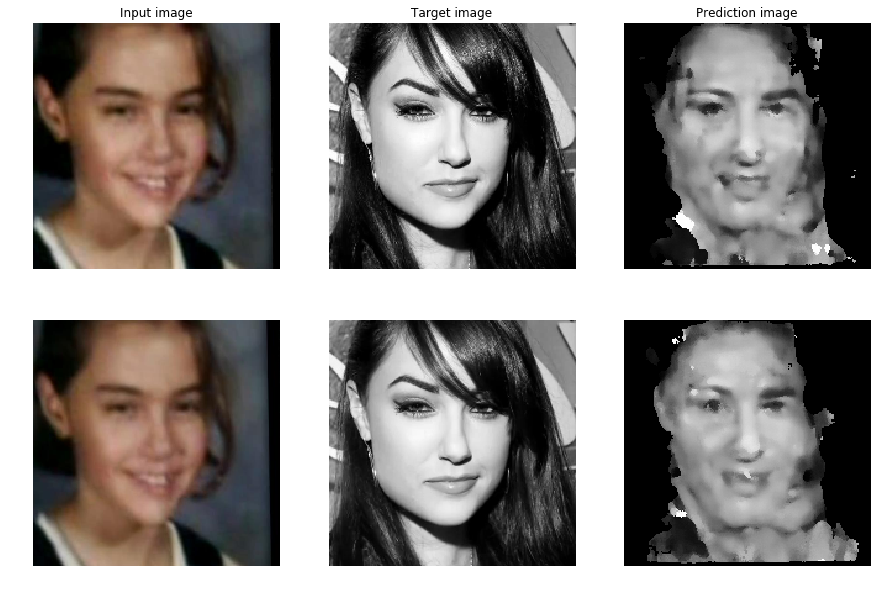

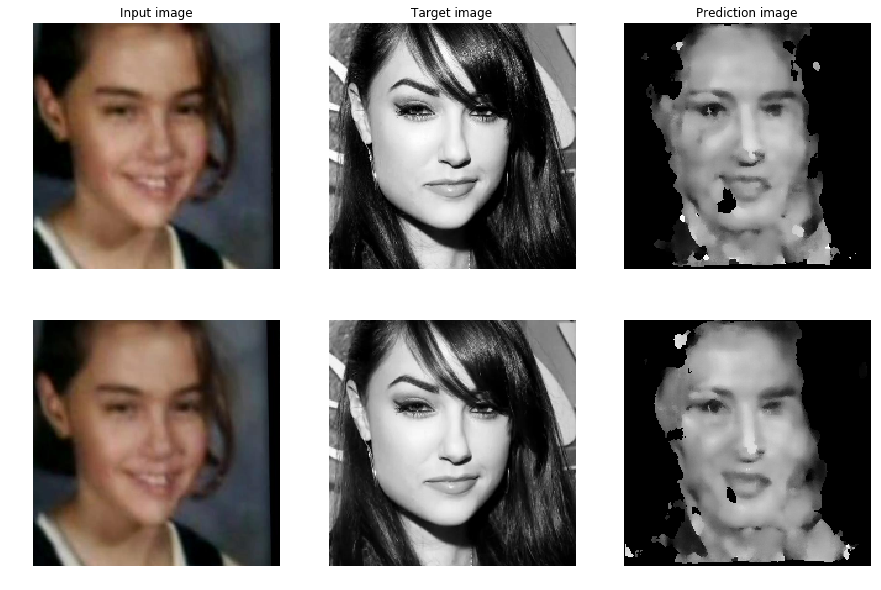

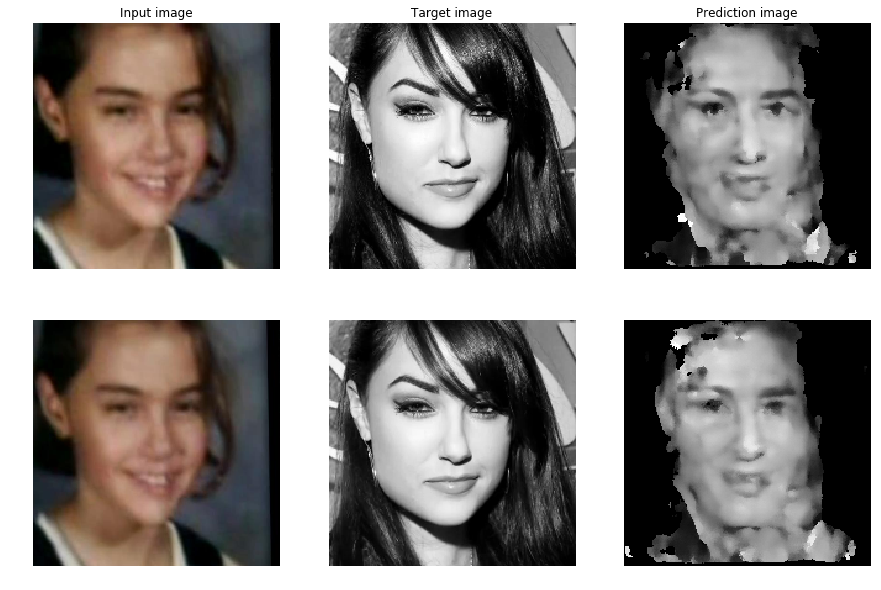

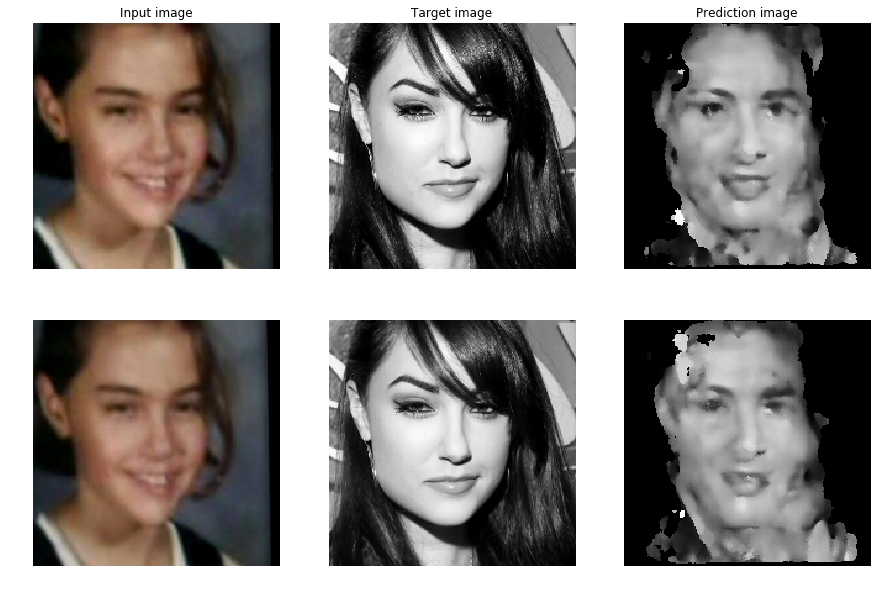

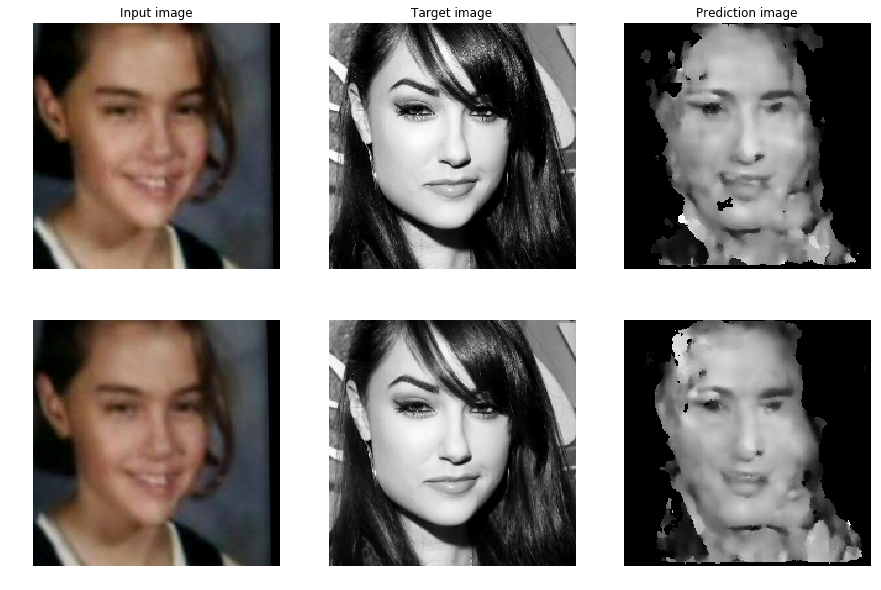

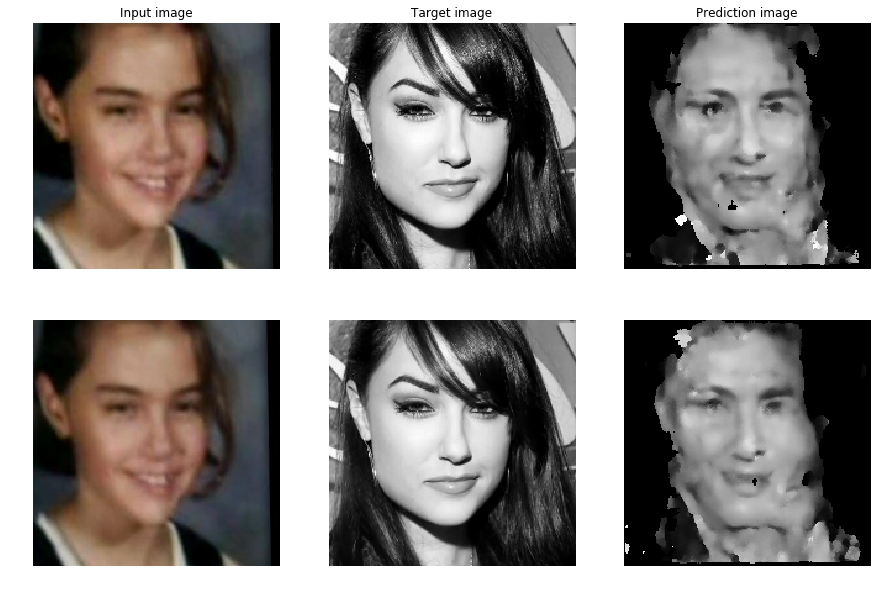

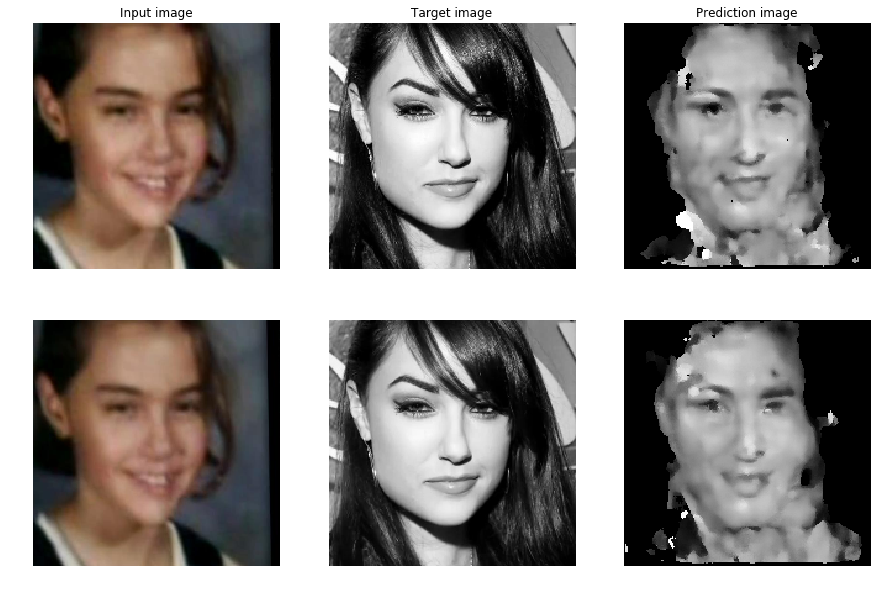

In [8]:
for i in range(11):
    startEpoch = 470
    intEpochs = 10
    model = torch.load('models/convage_nn_background_' + str(startEpoch + i * intEpochs) + '_epochs.model')
    model.cpu()
    
    num_example_imgs = 2
    plt.figure(figsize=(15, 5 * num_example_imgs))
    
    for i, (img, target) in enumerate(val_data[10:10+num_example_imgs]):
        inputs = img.unsqueeze(0)
        inputs = Variable(inputs)
        if model.is_cuda:
            inputs = inputs.cuda()

        outputs = model.forward(inputs)
        _, preds = torch.max(outputs, 1)
        pred = preds[0].data.cpu()

        img, target, pred = img.numpy(), target.numpy(), pred.numpy()

        # img
        plt.subplot(num_example_imgs, 3, i * 3 + 1)
        plt.axis('off')
        plt.imshow(img.transpose(1,2,0))
        if i == 0:
            plt.title("Input image")

        # target
        plt.subplot(num_example_imgs, 3, i * 3 + 2)
        plt.axis('off')
        target /= 255
        plt.imshow(target.reshape(200,200), cmap='gray')
        if i == 0:
            plt.title("Target image")

        # pred
        plt.subplot(num_example_imgs, 3, i * 3 + 3)
        plt.axis('off')
        plt.imshow(pred.reshape(200,200), cmap='gray')
        if i == 0:
            plt.title("Prediction image")
    plt.show()